## Random Acts of Pizza

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
data = pd.read_json('../../Dataset/Random Acts Of Pizza/train.json')

In [5]:
data.head()

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 32 columns):
giver_username_if_known                                 4040 non-null object
number_of_downvotes_of_request_at_retrieval             4040 non-null int64
number_of_upvotes_of_request_at_retrieval               4040 non-null int64
post_was_edited                                         4040 non-null int64
request_id                                              4040 non-null object
request_number_of_comments_at_retrieval                 4040 non-null int64
request_text                                            4040 non-null object
request_text_edit_aware                                 4040 non-null object
request_title                                           4040 non-null object
requester_account_age_in_days_at_request                4040 non-null float64
requester_account_age_in_days_at_retrieval              4040 non-null float64
requester_days_since_first_post_on_raop_at_reque

In [7]:
test = pd.read_json('../../Dataset/Random Acts Of Pizza/test.json')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631 entries, 0 to 1630
Data columns (total 17 columns):
giver_username_if_known                               1631 non-null object
request_id                                            1631 non-null object
request_text_edit_aware                               1631 non-null object
request_title                                         1631 non-null object
requester_account_age_in_days_at_request              1631 non-null float64
requester_days_since_first_post_on_raop_at_request    1631 non-null float64
requester_number_of_comments_at_request               1631 non-null int64
requester_number_of_comments_in_raop_at_request       1631 non-null int64
requester_number_of_posts_at_request                  1631 non-null int64
requester_number_of_posts_on_raop_at_request          1631 non-null int64
requester_number_of_subreddits_at_request             1631 non-null int64
requester_subreddits_at_request                       1631 non-null obj

In [9]:
not_present = []
for i in data.columns:
    if i not in test.columns:
        not_present.append(i)
not_present.remove('requester_received_pizza')
data.drop(labels=not_present,axis=1,inplace=True)

In [10]:
data.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


## Deleting the outliers and plotting the desired quantities

In [11]:
data_new = data[data['requester_upvotes_minus_downvotes_at_request'] < 40000]

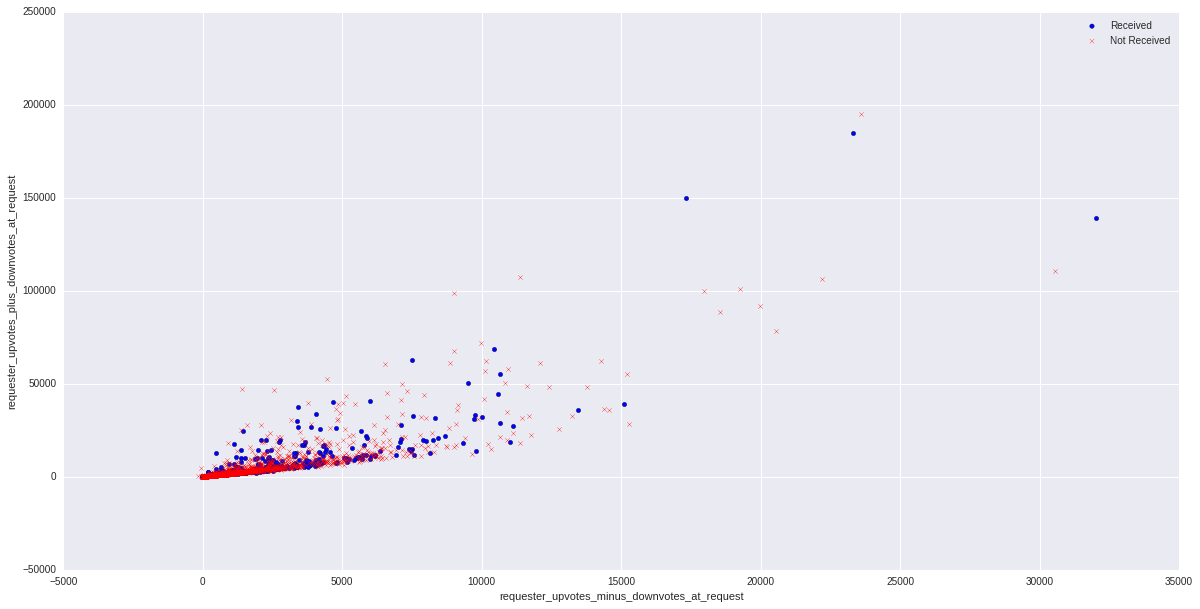

In [12]:
ax = data_new[data_new['requester_received_pizza'] == True].plot(kind='scatter',x='requester_upvotes_minus_downvotes_at_request',y='requester_upvotes_plus_downvotes_at_request',c='b',label='Received')
data_new[data_new['requester_received_pizza'] == False].plot(kind='scatter',x='requester_upvotes_minus_downvotes_at_request',y='requester_upvotes_plus_downvotes_at_request',c='r',ax=ax,marker='x',label='Not Received')
plt.legend()

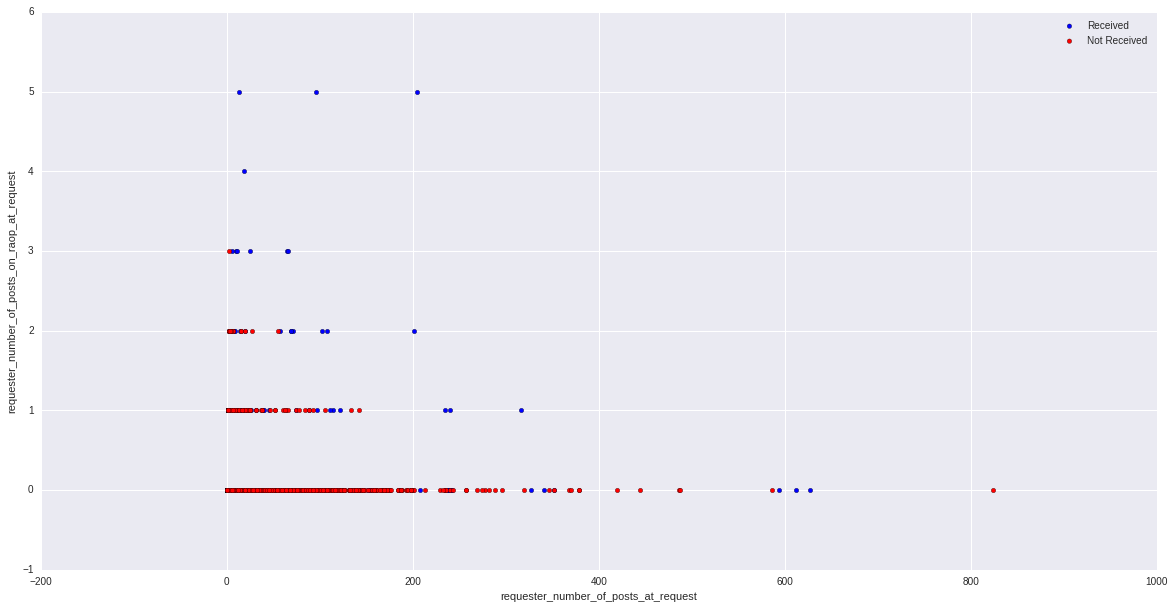

In [13]:
ax = data_new[data_new['requester_received_pizza'] == True].plot(kind='scatter',x='requester_number_of_posts_at_request',y='requester_number_of_posts_on_raop_at_request',label='Received',c='b')
data_new[data_new['requester_received_pizza'] == False].plot(kind='scatter',x='requester_number_of_posts_at_request',y='requester_number_of_posts_on_raop_at_request',label='Not Received',c='r',ax=ax)

This implies that both the distributions i.e for the pizza received and the pizza not received are almost identical in nature. Thus we cannot apply different models on pizza received and not received labels and ensemble the model

## Applying a Benchmark Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=50)

In [15]:
data.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


In [16]:
data_new = data.drop(labels=['giver_username_if_known','request_id','request_text_edit_aware','requester_subreddits_at_request',\
                            'requester_username'],axis=1)

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 13 columns):
request_title                                         4040 non-null object
requester_account_age_in_days_at_request              4040 non-null float64
requester_days_since_first_post_on_raop_at_request    4040 non-null float64
requester_number_of_comments_at_request               4040 non-null int64
requester_number_of_comments_in_raop_at_request       4040 non-null int64
requester_number_of_posts_at_request                  4040 non-null int64
requester_number_of_posts_on_raop_at_request          4040 non-null int64
requester_number_of_subreddits_at_request             4040 non-null int64
requester_received_pizza                              4040 non-null bool
requester_upvotes_minus_downvotes_at_request          4040 non-null int64
requester_upvotes_plus_downvotes_at_request           4040 non-null int64
unix_timestamp_of_request                             4040 non-null int64
u

In [18]:
data_new['account_age'] = pd.to_numeric(data_new.requester_account_age_in_days_at_request,errors='coerce')
data_new.drop(labels=['requester_account_age_in_days_at_request','request_title'],axis=1,inplace=True)

In [19]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 12 columns):
requester_days_since_first_post_on_raop_at_request    4040 non-null float64
requester_number_of_comments_at_request               4040 non-null int64
requester_number_of_comments_in_raop_at_request       4040 non-null int64
requester_number_of_posts_at_request                  4040 non-null int64
requester_number_of_posts_on_raop_at_request          4040 non-null int64
requester_number_of_subreddits_at_request             4040 non-null int64
requester_received_pizza                              4040 non-null bool
requester_upvotes_minus_downvotes_at_request          4040 non-null int64
requester_upvotes_plus_downvotes_at_request           4040 non-null int64
unix_timestamp_of_request                             4040 non-null int64
unix_timestamp_of_request_utc                         4040 non-null int64
account_age                                           4040 non-null float64
dt

In [20]:
y = data_new.pop('requester_received_pizza')
y = y.map({False:0,True:1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: requester_received_pizza, dtype: int64

In [21]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_new,y,test_size=0.1,random_state=7)
print X_train.shape,y_train.shape

(3636, 11) (3636,)


In [22]:
rfr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
from sklearn.metrics import roc_auc_score,accuracy_score
print 'ROC AUC Score: {}'.format(roc_auc_score(rfr.predict(X_test),y_test))
print 'Accuracy Score: {}'.format(accuracy_score(rfr.predict(X_test),y_test))

ROC AUC Score: 0.598489010989
Accuracy Score: 0.737623762376


The benchmark score is too low to be of any importance. So we consider the textual columns too.

## Bag Of Words Approach

### Count Vectorizer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = CountVectorizer(min_df=1)

In [26]:
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
from nltk.corpus import genesis

In [28]:
genesis.fileids()

[u'english-kjv.txt',
 u'english-web.txt',
 u'finnish.txt',
 u'french.txt',
 u'german.txt',
 u'lolcat.txt',
 u'portuguese.txt',
 u'swedish.txt']

In [29]:
doc = genesis.words('english-kjv.txt')

In [30]:
text = ' '.join(doc)

In [31]:
from nltk.tokenize import sent_tokenize

In [32]:
document = sent_tokenize(text)

In [33]:
X = vectorizer.fit_transform(document)

In [34]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
print X.shape

(1467, 2603)


In [36]:
transformer = TfidfVectorizer()

In [37]:
transformer

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [38]:
tfidf = transformer.fit_transform(document)

In [39]:
tfidf

<1467x2603 sparse matrix of type '<type 'numpy.float64'>'
	with 28503 stored elements in Compressed Sparse Row format>

In [40]:
tfidf.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [41]:
tfidf.shape

(1467, 2603)

## Non negative Matrix Factorisation and Latend Dirichlet Allocation

In [42]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck <L.J.Buitinck@uva.nl>
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def applyLDA(data_samples):
    
    # Use tf-idf features for NMF.
    print("Extracting tf features for LDA...")
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                stop_words='english')
    tf = tf_vectorizer.fit_transform(data_samples)
    
    # Fit the NMF model
    print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
    lda.fit(tf)
    return lda.transform(tf)


In [43]:
def applyNMF(data_samples):
    print("Extracting tf-idf features for NMF...")
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(data_samples)
    print("Fitting the NMF model with tf-idf features,"
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
    nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
    return nmf.transform(tfidf)

### Using LDA

In [44]:
parent_data = data.copy()

In [45]:
topics = applyLDA(data['request_text_edit_aware'])
print(topics.shape)

Extracting tf features for LDA...
Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
(4040, 10)


In [46]:
t = np.asarray([np.argmax(row) for row in topics])

In [47]:
data['topics'] = t

In [48]:
for i in data.columns:
    if data[i].dtype == 'object':
        data.pop(i)

In [49]:
data.head()

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics
0,0.000000,0.000000,0,0,0,0,0,False,0,0,1317852607,1317849007,8
1,501.111100,0.000000,0,0,15,0,12,False,34,116,1332652424,1332648824,5
2,0.000000,0.000000,0,0,0,0,0,False,0,0,1319650094,1319646494,1
3,6.518438,0.000000,36,0,1,0,4,False,54,76,1322855434,1322855434,8
4,162.063252,101.606505,140,2,14,0,11,False,1121,1733,1373657691,1373654091,1


In [50]:
y = data.pop('requester_received_pizza')

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestClassifier(n_estimators=100)

In [52]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)

In [53]:
rfr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,rfr.predict_proba(X_test)[:,1])))

ROC AUC Score: 0.618674761006


The LDA Model increases the AUC Score. We can also use the giver username column by mapping all the N/A usernames to 0 and other to 1

### Using NMF

In [55]:
data.head()

,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics
0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,8
1,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,5
2,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,1
3,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,8
4,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,1


In [56]:
topics = applyNMF(parent_data['request_text_edit_aware'])
print topics.shape

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
(4040, 10)


In [57]:
t = np.asarray([np.argmax(row) for row in topics])

In [58]:
data['topics'] = t

In [59]:
rfr = RandomForestClassifier(n_estimators=100)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)

In [61]:
rfr.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [62]:
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,rfr.predict_proba(X_test)[:,1])))

ROC AUC Score: 0.609404505488


## Converting "giver_username...." column to 0 and 1

In [63]:
parent_data.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


In [64]:
data = parent_data.copy()

In [65]:
data.giver_username_if_known = data.giver_username_if_known.map({'N/A':0})
data.giver_username_if_known.fillna(1,inplace=True)

In [66]:
data.giver_username_if_known.unique()

array([ 0.,  1.])

In [67]:
data['topics'] = t

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 19 columns):
giver_username_if_known                               4040 non-null float64
request_id                                            4040 non-null object
request_text_edit_aware                               4040 non-null object
request_title                                         4040 non-null object
requester_account_age_in_days_at_request              4040 non-null float64
requester_days_since_first_post_on_raop_at_request    4040 non-null float64
requester_number_of_comments_at_request               4040 non-null int64
requester_number_of_comments_in_raop_at_request       4040 non-null int64
requester_number_of_posts_at_request                  4040 non-null int64
requester_number_of_posts_on_raop_at_request          4040 non-null int64
requester_number_of_subreddits_at_request             4040 non-null int64
requester_received_pizza                              4040 non-null bo

In [69]:
data.drop(labels=[i for i in data.columns if data[i].dtype == 'object'],axis=1,inplace=True)
y = data.pop('requester_received_pizza')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4040 entries, 0 to 4039
Data columns (total 13 columns):
giver_username_if_known                               4040 non-null float64
requester_account_age_in_days_at_request              4040 non-null float64
requester_days_since_first_post_on_raop_at_request    4040 non-null float64
requester_number_of_comments_at_request               4040 non-null int64
requester_number_of_comments_in_raop_at_request       4040 non-null int64
requester_number_of_posts_at_request                  4040 non-null int64
requester_number_of_posts_on_raop_at_request          4040 non-null int64
requester_number_of_subreddits_at_request             4040 non-null int64
requester_upvotes_minus_downvotes_at_request          4040 non-null int64
requester_upvotes_plus_downvotes_at_request           4040 non-null int64
unix_timestamp_of_request                             4040 non-null int64
unix_timestamp_of_request_utc                         4040 non-null int64

In [70]:
rfc = RandomForestClassifier(n_estimators=100)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(2828, 13) (2828,)


In [72]:
rfc.fit(X_train,y_train)
print 'AUC Score: {}'.format(roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print 'Accuracy Score: {}'.format(accuracy_score(y_test,rfc.predict(X_test)))

AUC Score: 0.731796957984
Accuracy Score: 0.813531353135


## Applying LDA to "request_title"

In [73]:
data.head()

,giver_username_if_known,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,5
1,0.0,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,8
2,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0
3,0.0,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,6
4,0.0,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,9


In [74]:
title_topics = applyNMF(parent_data['request_title'])

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...


In [75]:
print title_topics.shape

(4040, 10)


In [76]:
title_topics_max = np.asarray([np.argmax(i) for i in title_topics])

In [77]:
title_topics_max

array([2, 4, 5, ..., 5, 3, 5])

In [78]:
data['request_title'] = title_topics_max

In [79]:
data.head()

,giver_username_if_known,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics,request_title
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,5,2
1,0.0,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,8,4
2,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0,5
3,0.0,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,6,9
4,0.0,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,9,5


In [80]:
rfc = RandomForestClassifier(n_estimators=50)

In [81]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(2828, 14) (2828,)


In [82]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
print 'AUC Score: {}'.format(roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))
print 'Accuracy Score: {}'.format(accuracy_score(y_test,rfc.predict(X_test)))

AUC Score: 0.749286336008
Accuracy Score: 0.810231023102


In [84]:
rfc.feature_importances_

array([ 0.21678635,  0.0695241 ,  0.02908929,  0.0550755 ,  0.02824536,
        0.05458513,  0.01235779,  0.0533951 ,  0.06877821,  0.07164765,
        0.12782733,  0.12394342,  0.03333655,  0.05540822])

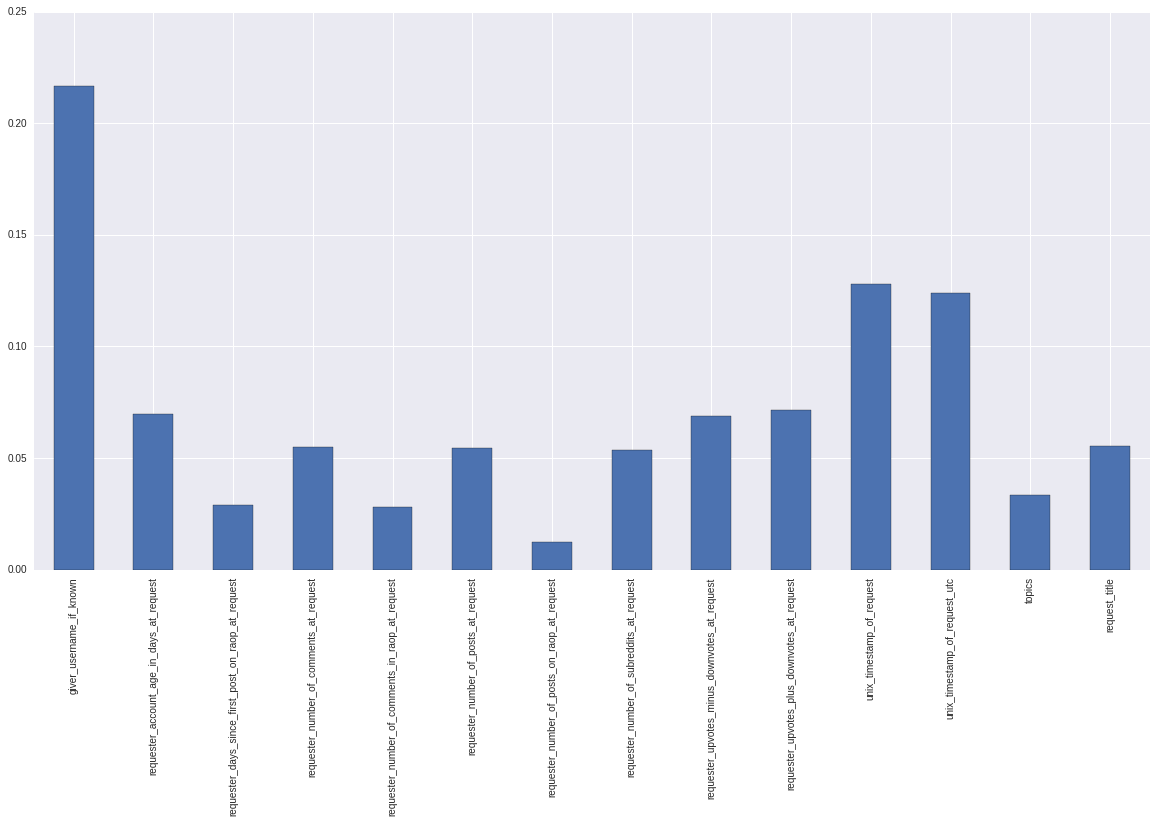

In [85]:
feature_importance = pd.Series(rfc.feature_importances_,index=data.columns)
feature_importance.plot(kind='bar')

## Applying XGBoost as a Classifier

In [86]:
data.head()

,giver_username_if_known,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics,request_title
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,5,2
1,0.0,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,8,4
2,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0,5
3,0.0,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,6,9
4,0.0,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,9,5


In [87]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(2828, 14) (2828,)


In [88]:
from xgboost.sklearn import XGBClassifier

In [89]:
xgb = XGBClassifier()

In [90]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [91]:
print 'AUC Score: {}'.format(roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1]))

AUC Score: 0.750992122035


## Removing Stop Words from request text

In [92]:
parent_data.head()

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_l25d7,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,0.000000,0,0,0,0,0,False,[],0,0,nickylvst,1317852607,1317849007
1,N/A,t3_rcb83,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,0.000000,0,0,15,0,12,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,116,fohacidal,1332652424,1332648824
2,N/A,t3_lpu5j,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,0.000000,0,0,0,0,0,False,[],0,0,jacquibatman7,1319650094,1319646494
3,N/A,t3_mxvj3,"It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,0.000000,36,0,1,0,4,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,76,4on_the_floor,1322855434,1322855434
4,N/A,t3_1i6486,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,101.606505,140,2,14,0,11,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1733,Futuredogwalker,1373657691,1373654091


In [93]:
data = parent_data.copy()

In [94]:
from nltk.corpus import stopwords

In [95]:
data['request_text_edit_aware'] = map(lambda x: ' '.join([i for i in x.lower().split(' ') if i not in stopwords.words('english')]),\
    data['request_text_edit_aware'])

In [96]:
topics = applyNMF(data['request_text_edit_aware'])
print topics.shape

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
(4040, 10)


In [97]:
t = [np.argmax(row) for row in topics]

In [98]:
data['topics'] = t

In [99]:
data.giver_username_if_known = data.giver_username_if_known.map({'N/A':0})
data.giver_username_if_known.fillna(1,inplace=True)

In [100]:
y = data.pop('requester_received_pizza')

In [101]:
for col in data.columns:
    if data[col].dtype == 'object':
        data.pop(col)

In [102]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(2828, 13) (2828,)


In [103]:
rfc = RandomForestClassifier(n_estimators=100)

In [104]:
rfc.fit(X_train,y_train)
print 'AUC Score: {}'.format(roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1]))

AUC Score: 0.740490012392


In [105]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [106]:
print 'AUC Score using XGBoost: {}'.format(roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1]))

AUC Score using XGBoost: 0.750521878319


## Length of request as a feature and Number of Subreddits as a feature

In [107]:
data['request_length'] = [len(x) for x in parent_data['request_text_edit_aware']]

In [108]:
data.head()

,giver_username_if_known,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics,request_length
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,6,316
1,0.0,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,3,74
2,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0,277
3,0.0,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,3,172
4,0.0,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,5,490


In [109]:
subreddits = map(lambda x: ' '.join(x),parent_data['requester_subreddits_at_request'])

In [110]:
topics = applyNMF(subreddits)
print topics.shape

Extracting tf-idf features for NMF...
Fitting the NMF model with tf-idf features,n_samples=2000 and n_features=1000...
(4040, 10)


In [111]:
t = np.asarray([np.argmax(row) for row in topics])
print t.shape

(4040,)


In [112]:
data['subreddit_topics'] = t

In [113]:
count = dict()
for i in range(parent_data.shape[0]):
    if parent_data.iloc[i,-7] == True:
        for subreddit in parent_data.iloc[i,-6]:
            try:
                count[subreddit] += 1
            except:
                count[subreddit] = 1

In [114]:
count_series = pd.Series(count.values(),index = count.keys())
count_series.sort_values(ascending=False,inplace=True)

In [115]:
subreddits = set(count_series[count_series > 300].index)
subreddits

{u'AskReddit',
 u'IAmA',
 u'Random_Acts_Of_Pizza',
 u'WTF',
 u'funny',
 u'gaming',
 u'pics',
 u'todayilearned',
 u'videos'}

In [116]:
data['subreddit_count'] = map(lambda x: len(set(x).intersection(subreddits)),\
                              parent_data['requester_subreddits_at_request'])

In [117]:
data.head()

,giver_username_if_known,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,unix_timestamp_of_request,unix_timestamp_of_request_utc,topics,request_length,subreddit_topics,subreddit_count
0,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1317852607,1317849007,6,316,0,0
1,0.0,501.111100,0.000000,0,0,15,0,12,34,116,1332652424,1332648824,3,74,4,3
2,0.0,0.000000,0.000000,0,0,0,0,0,0,0,1319650094,1319646494,0,277,0,0
3,0.0,6.518438,0.000000,36,0,1,0,4,54,76,1322855434,1322855434,3,172,4,3
4,0.0,162.063252,101.606505,140,2,14,0,11,1121,1733,1373657691,1373654091,5,490,5,2


In [118]:
xgb = XGBClassifier()

In [119]:
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.3,random_state=7)
print X_train.shape,y_train.shape

(2828, 16) (2828,)


In [120]:
xgb.fit(X_train,y_train)
print 'Training AUC Score with XGBoost: {}'.format(roc_auc_score(y_train,xgb.predict_proba(X_train)[:,1]))
print 'Testing AUC Score with XGBoost: {}'.format(roc_auc_score(y_test,xgb.predict_proba(X_test)[:,1]))

Training AUC Score with XGBoost: 0.887312845555
Testing AUC Score with XGBoost: 0.770959961053


### By using mean of the probabilities

In [121]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
yPred_rfc = rfc.predict_proba(X_train)
print yPred_rfc.shape

(2828, 2)


In [123]:
yPred_xgb = xgb.predict_proba(X_train)
print yPred_xgb.shape

(2828, 2)


In [124]:
print roc_auc_score(y_train,((yPred_rfc+yPred_xgb)/2)[:,1])

0.999317970862


In [125]:
test_rfc = rfc.predict_proba(X_test)
test_xgb  = xgb.predict_proba(X_test)
print test_rfc.shape,test_xgb.shape

(1212, 2) (1212, 2)


In [126]:
print roc_auc_score(y_test,((test_rfc+test_xgb)/2)[:,1])

0.771339844211


### By using weighted mean of the probabilities

In [127]:
print roc_auc_score(y_test,(0.9*test_xgb+0.1*test_rfc)[:,1])

0.771996341319


In [128]:
max_score = 0
xgb_weight,rfc_weight=0,0
for i in np.arange(0.9,0.1,-0.1):
    score = roc_auc_score(y_test,(i*test_xgb+(1-i)*test_rfc)[:,1])
    if score > max_score:
        max_score = score
        xgb_weight = i
        rfc_weight = 1-i
print 'Maximum score: {}'.format(max_score)
print 'XGB Weight: {}'.format(xgb_weight)
print 'RFC Weight: {}'.format(rfc_weight)

Maximum score: 0.772781924938
XGB Weight: 0.8
RFC Weight: 0.2
